In [1]:
 import os
 import re
 import html
 import string
 import unicodedata
 import nltk
 nltk.download('punkt')
 from nltk.corpus import stopwords
 nltk.download('stopwords')
 nltk.download('wordnet')
 from nltk.stem import PorterStemmer
 from nltk.tokenize import word_tokenize, sent_tokenize
 from nltk.stem import WordNetLemmatizer
 from tensorflow.keras.preprocessing.text import text_to_word_sequence
 from tensorflow.keras.preprocessing.text import Tokenizer
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 from tensorflow.keras import models
 from tensorflow.keras import layers
 from tensorflow.keras import losses
 from tensorflow.keras import metrics
 from tensorflow.keras import optimizers
 from tensorflow.keras.callbacks import EarlyStopping
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
df.shape

(416809, 3)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
n_classes = df['label'].nunique()
n_classes

6

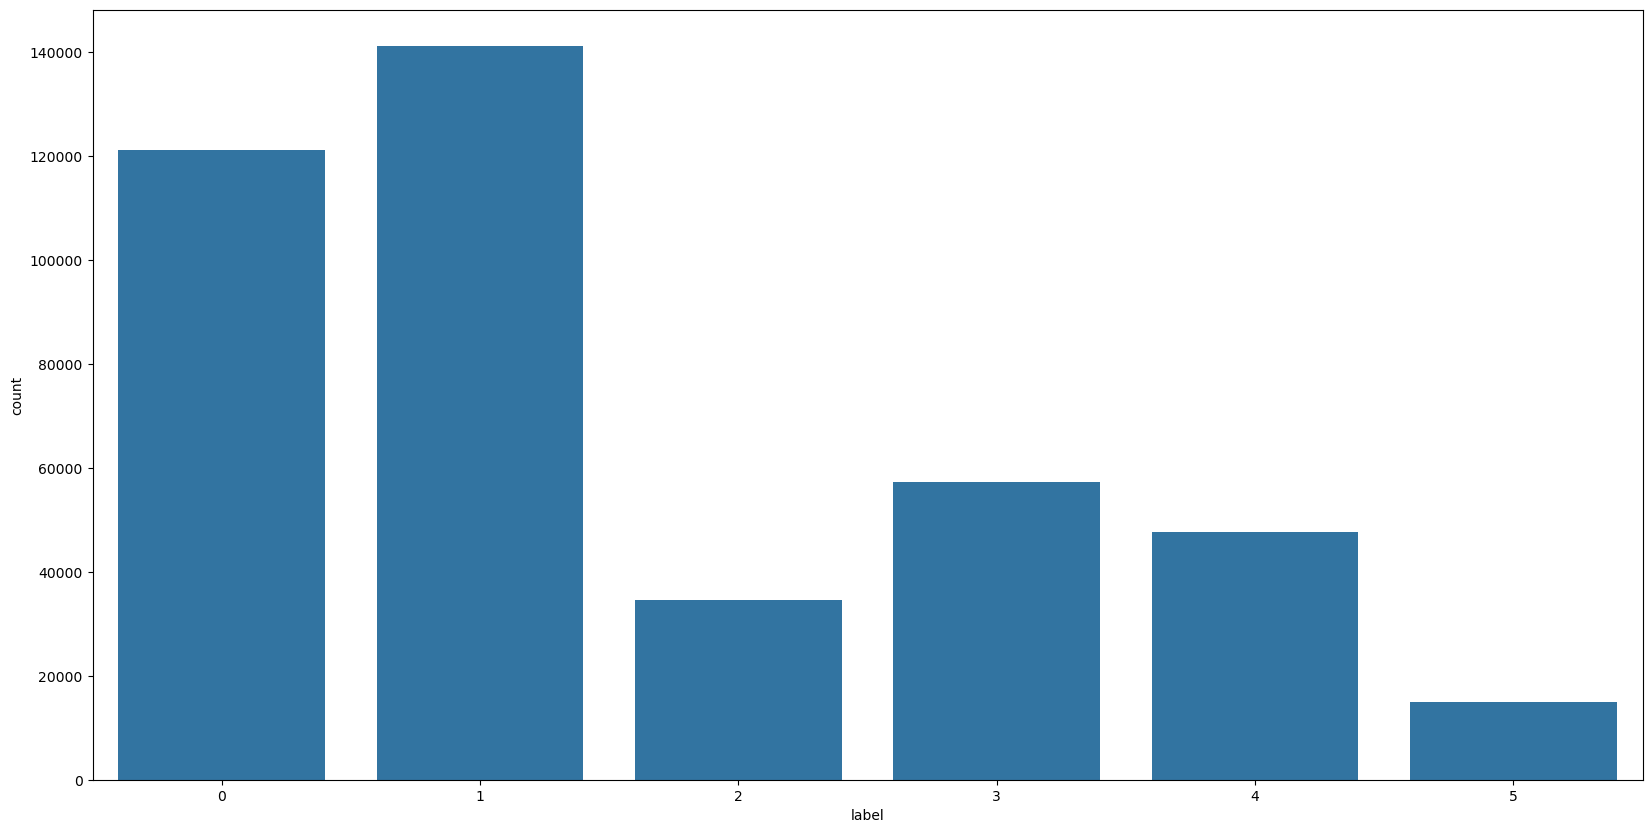

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='label')
plt.show()

In [8]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>') 
    return pattern.sub('', text)

df['text'] = df['text'].apply(remove_html_tags)

In [9]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+') 
    return pattern.sub('', text)

df['text'] = df['text'].apply(remove_url)

In [10]:
def remove_digits(text):
    return re.sub(r'\d+','', text) 
df['text'] = df['text'].apply(remove_digits)

In [11]:
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punc (text):
    for char in exclude:
        text = text.replace(char,'')
    return text
df['text']=df['text'].apply(remove_punc)

In [13]:
from nltk.corpus import stopwords
import nltk
StopWords = stopwords.words("english")

In [14]:
def remove_stopwords (text):
    filtered_text = ' '.join(word for word in text.split() if word.lower() not in StopWords)
    return filtered_text 

df['text']=df['text'].apply(remove_stopwords)

In [15]:
#stemming
ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

df['text']=df['text'].apply(stem_words)
df.head()

,text,label
0,feel realli helpless heavi heart,4
1,ive enjoy abl slouch relax unwind frankli need...,0
2,gave internship dmrg feel distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughli weari job take...,4


In [16]:
df['text'] = df['text'].str.lower()
df.head()

,text,label
0,feel realli helpless heavi heart,4
1,ive enjoy abl slouch relax unwind frankli need...,0
2,gave internship dmrg feel distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughli weari job take...,4


In [17]:
# Texts to Sequences
vocab_sz = 10000 
from tensorflow import keras
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_sz, oov_token='UNK')
tokenizer.fit_on_texts(df['text'])
df['text_sequences'] = tokenizer.texts_to_sequences(df['text'])
df.head()

,text,label,text_sequences
0,feel realli helpless heavi heart,4,"[2, 7, 216, 1256, 134]"
1,ive enjoy abl slouch relax unwind frankli need...,0,"[22, 169, 113, 1, 266, 5008, 1849, 28, 82, 69,..."
2,gave internship dmrg feel distraught,4,"[748, 4310, 1, 2, 998]"
3,dont know feel lost,0,"[29, 5, 2, 177]"
4,kindergarten teacher thoroughli weari job take...,4,"[4593, 849, 2003, 2708, 226, 621, 855, 3787, 1..."


In [18]:
len(df['text_sequences'])

416809

In [19]:
input_shape=int(sum(df['text_sequences'].apply(lambda x:len(x)))/len(df['text_sequences']))
input_shape

9

In [20]:
# Sequence Padding
maxlen=100
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['text_sequences'],maxlen=maxlen)

In [21]:
y=df['label']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100) # encoded_matrix
print("X_train : \n",x_train)
print("X_test  : \n",x_test)

X_train : 
 [[   0    0    0 ...    3  146  927]
 [   0    0    0 ...  310    2  320]
 [   0    0    0 ... 2459    2  487]
 ...
 [   0    0    0 ...    2 1542  191]
 [   0    0    0 ...  401  770  293]
 [   0    0    0 ...    8    2  141]]
X_test  : 
 [[   0    0    0 ...    3    2  217]
 [   0    0    0 ... 3616  304   73]
 [   0    0    0 ...  516 7330  973]
 ...
 [   0    0    0 ...    1 1474    1]
 [   0    0    0 ...   25   16 3447]
 [   0    0    0 ...    2  783  476]]


In [23]:
print("X_train shape : ",x_train.shape)
print("X_test  shape : ",x_test.shape)
print("y_train shape : ",x_train.shape)
print("y_test  shape : ",x_test.shape)

X_train shape :  (333447, 100)
X_test  shape :  (83362, 100)
y_train shape :  (333447, 100)
y_test  shape :  (83362, 100)


In [24]:
Max_words=(max(map(max, x)))+1
Max_words

10000

In [25]:
x_train_padded = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [26]:
print("First padded training sequence:", x_train_padded[0])
print("First padded testing sequence:", x_test_padded[0])

First padded training sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  86   2   3 146 927]
First padded testing sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   3   2 217]


In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.layers import Embedding
from keras.layers import LSTM

embedding_size = 100

# Model: Enhanced LSTM with multiple layers
model = Sequential()
model.add(Embedding(vocab_sz + 1, embedding_size, mask_zero=True, input_length=maxlen,input_shape=[input_shape]))

# Add the first LSTM layer
model.add(LSTM(100, return_sequences=True,recurrent_dropout=0.2,dropout=0.2))  # Return sequences to pass to the next LSTM layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Add a second LSTM layer
model.add(LSTM(100, return_sequences=True,recurrent_dropout=0.2,dropout=0.2))
model.add(Dropout(0.3))

# Add a third LSTM layer
model.add(LSTM(100,recurrent_dropout=0.2,dropout=0.2))
model.add(Dropout(0.3))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))  # Intermediate dense layer for more learning capacity
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout for dense layer

# Output layer
model.add(Dense(n_classes, activation='softmax'))  # For classification

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',  # Use sparse if labels are integers
    optimizer='adam',
    metrics=['accuracy']
)

# Model summary
model.summary()

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 9, 100)         │     1,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 9, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 9, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248,410 (4.76 MB)

 Trainable params: 1,248,282 (4.76 MB)

 Non-trainable params: 128 (512.00 B)

In [28]:
checkpoint = EarlyStopping(monitor='val_accuracy',patience = 10 ,mode='max')
callbacks_lst = [checkpoint]

In [29]:
batch_size = 1500
epochs = 1
history = model.fit(x_train_padded, y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,callbacks=callbacks_lst)

178/178 ━━━━━━━━━━━━━━━━━━━━ 941s 5s/step - accuracy: 0.5910 - loss: 1.1030 - val_accuracy: 0.7872 - val_loss: 1.0609


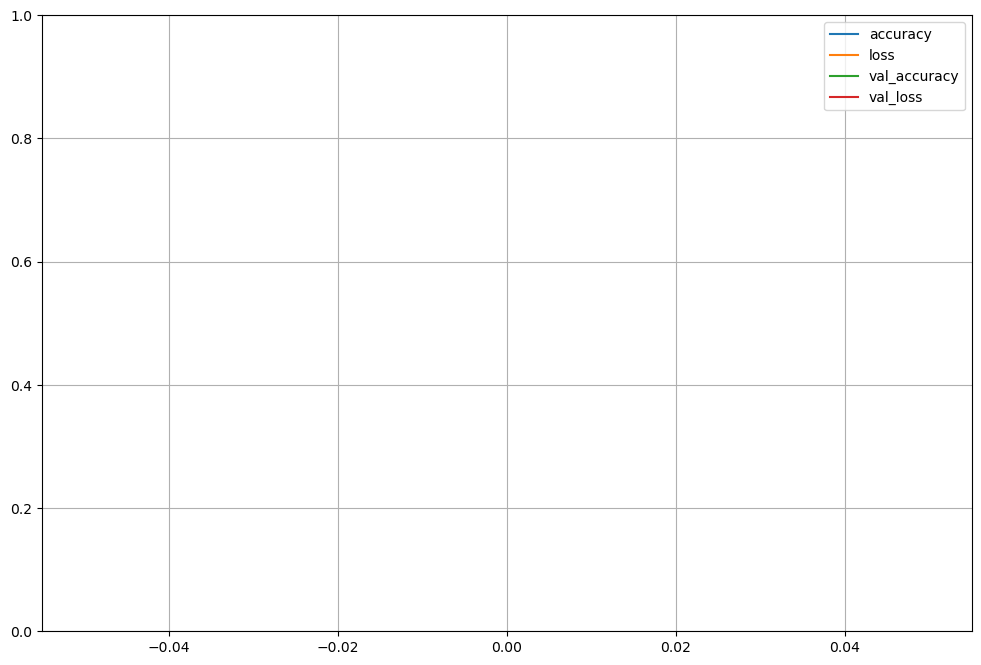

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 159s 61ms/step - accuracy: 0.7885 - loss: 1.0573
Loss     :  1.0589489936828613
accuracy :  0.7866173982620239


In [30]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(x_test_padded, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

In [31]:
y_pred = model.predict(x_test_padded).argmax(axis=-1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 303s 116ms/step


In [32]:
from sklearn.metrics  import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     24190
           1       0.67      0.99      0.80     28212
           2       0.96      0.04      0.08      6917
           3       0.95      0.68      0.79     11496
           4       0.93      0.67      0.78      9600
           5       0.97      0.08      0.16      2947

    accuracy                           0.79     83362
   macro avg       0.89      0.57      0.59     83362
weighted avg       0.84      0.79      0.75     83362



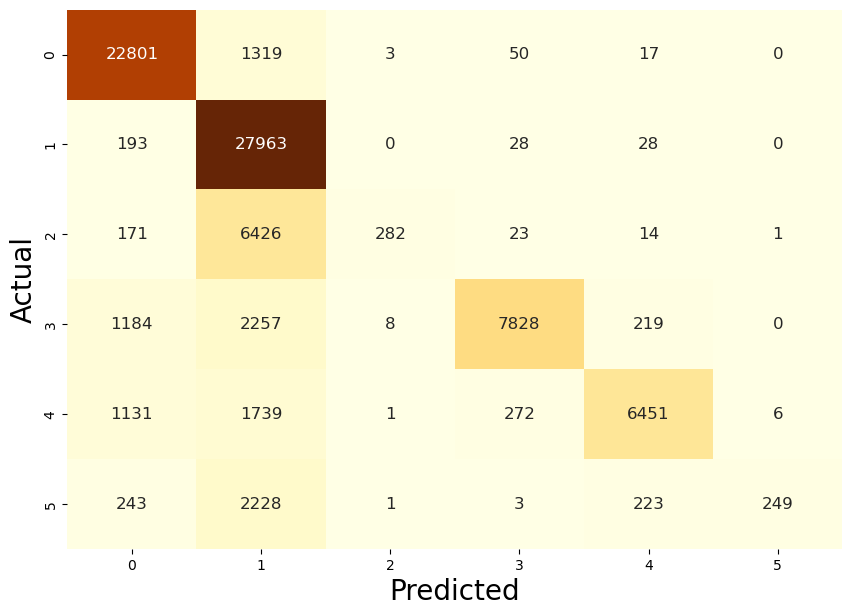

In [33]:
disp = confusion_matrix(y_test, y_pred)
disp.astype('int')
df_cm = pd.DataFrame(disp)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=True, annot_kws={"size":12},ax=ax, cmap="YlOrBr", fmt='g',cbar=False) #font
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.show()